In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. Load and prepare sample data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [4]:
print("Original dataset shape:", X.shape)
print("\nOriginal variance of features:")
print(X.var().round(4))

Original dataset shape: (569, 30)

Original variance of features:
mean radius                    12.4189
mean texture                   18.4989
mean perimeter                590.4405
mean area                  123843.5543
mean smoothness                 0.0002
mean compactness                0.0028
mean concavity                  0.0064
mean concave points             0.0015
mean symmetry                   0.0008
mean fractal dimension          0.0000
radius error                    0.0769
texture error                   0.3043
perimeter error                 4.0879
area error                   2069.4316
smoothness error                0.0000
compactness error               0.0003
concavity error                 0.0009
concave points error            0.0000
symmetry error                  0.0001
fractal dimension error         0.0000
worst radius                   23.3602
worst texture                  37.7765
worst perimeter              1129.1308
worst area                 324167.385

In [5]:
# 2. Basic Variance Threshold
def plot_variance_distribution(X):
    plt.figure(figsize=(10, 6))
    X.var().hist(bins=30)
    plt.title('Distribution of Feature Variances')
    plt.xlabel('Variance')
    plt.ylabel('Frequency')
    plt.show()

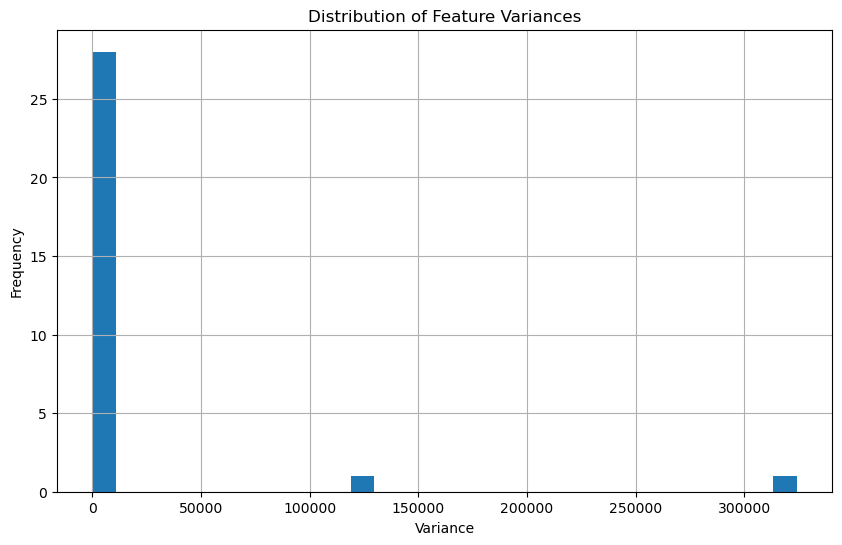

In [6]:
# Plot original variance distribution
plot_variance_distribution(X)

In [7]:
# 3. Apply different variance thresholds and compare results
thresholds = [0, 0.1, 0.5, 1.0, 2.0]
results = {}

In [8]:
for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X)
    results[threshold] = {
        'n_features': X_selected.shape[1],
        'features': X.columns[selector.get_support()].tolist()
    }

In [9]:
print("\nFeature selection results with different thresholds:")
for threshold, result in results.items():
    print(f"\nThreshold {threshold}:")
    print(f"Number of features selected: {result['n_features']}")
    print("Selected features:", result['features'][:5], "..." if len(result['features']) > 5 else "")


Feature selection results with different thresholds:

Threshold 0:
Number of features selected: 30
Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] ...

Threshold 0.1:
Number of features selected: 11
Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'texture error'] ...

Threshold 0.5:
Number of features selected: 10
Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error'] ...

Threshold 1.0:
Number of features selected: 10
Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error'] ...

Threshold 2.0:
Number of features selected: 10
Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error'] ...


In [10]:
# 4. Standardized data with Variance Threshold
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

In [11]:
print("\nVariance after standardization:")
print(X_scaled.var().round(4))


Variance after standardization:
mean radius                1.0018
mean texture               1.0018
mean perimeter             1.0018
mean area                  1.0018
mean smoothness            1.0018
mean compactness           1.0018
mean concavity             1.0018
mean concave points        1.0018
mean symmetry              1.0018
mean fractal dimension     1.0018
radius error               1.0018
texture error              1.0018
perimeter error            1.0018
area error                 1.0018
smoothness error           1.0018
compactness error          1.0018
concavity error            1.0018
concave points error       1.0018
symmetry error             1.0018
fractal dimension error    1.0018
worst radius               1.0018
worst texture              1.0018
worst perimeter            1.0018
worst area                 1.0018
worst smoothness           1.0018
worst compactness          1.0018
worst concavity            1.0018
worst concave points       1.0018
worst symmetry 

In [12]:
# Apply Variance Threshold on standardized data
threshold = 0.01  # Much lower threshold for standardized data
selector_scaled = VarianceThreshold(threshold=threshold)
X_selected_scaled = selector_scaled.fit_transform(X_scaled)

In [13]:
print(f"\nAfter Variance Threshold (threshold={threshold}) on standardized data:")
print("Number of features selected:", X_selected_scaled.shape[1])
selected_features = X_scaled.columns[selector_scaled.get_support()].tolist()
print("Selected features:", selected_features[:5], "..." if len(selected_features) > 5 else "")


After Variance Threshold (threshold=0.01) on standardized data:
Number of features selected: 30
Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] ...


In [14]:
# 5. Demonstration with custom dataset including near-constant features
# Create sample dataset with different variance levels
np.random.seed(42)
n_samples = 1000
custom_data = pd.DataFrame({
    'constant': [1] * n_samples,  # Variance = 0
    'nearly_constant': [1] * (n_samples-1) + [2],  # Very low variance
    'binary': np.random.choice([0, 1], n_samples),  # Binary feature
    'normal': np.random.normal(0, 1, n_samples),  # Normal distribution
    'uniform': np.random.uniform(0, 1, n_samples)  # Uniform distribution
})

In [15]:
print("\nCustom dataset variances:")
print(custom_data.var().round(4))


Custom dataset variances:
constant           0.0000
nearly_constant    0.0010
binary             0.2502
normal             1.0026
uniform            0.0831
dtype: float64


In [16]:
# Apply Variance Threshold to custom dataset
selector_custom = VarianceThreshold(threshold=0.01)
X_selected_custom = selector_custom.fit_transform(custom_data)

In [17]:
print("\nSelected features from custom dataset:")
selected_features_custom = custom_data.columns[selector_custom.get_support()].tolist()
print(selected_features_custom)


Selected features from custom dataset:
['binary', 'normal', 'uniform']


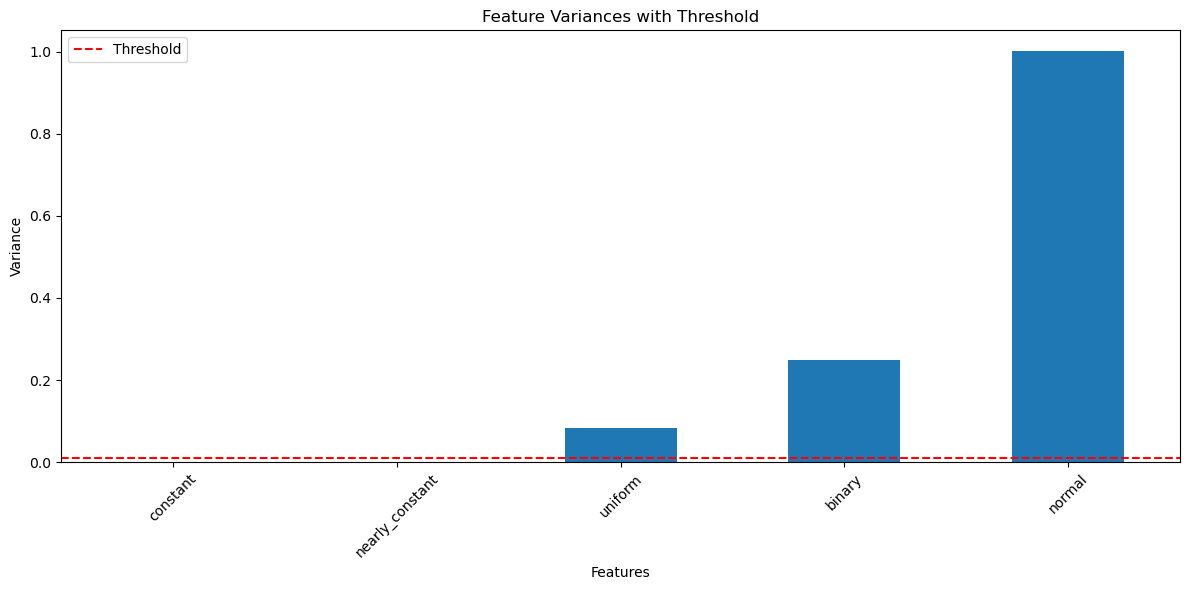

In [18]:
# 6. Visualization of feature variances
plt.figure(figsize=(12, 6))
variances = pd.Series(selector_custom.variances_, index=custom_data.columns)
variances.sort_values().plot(kind='bar')
plt.axhline(y=0.01, color='r', linestyle='--', label='Threshold')
plt.title('Feature Variances with Threshold')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# 7. Function to find optimal threshold based on desired feature reduction
def find_optimal_threshold(X, target_n_features):
    variances = X.var().sort_values()
    if target_n_features >= len(variances):
        return 0
    return variances.iloc[-target_n_features] - 1e-10

In [20]:
# Example of finding optimal threshold
target_features = 10
optimal_threshold = find_optimal_threshold(X, target_features)
selector_optimal = VarianceThreshold(threshold=optimal_threshold)
X_selected_optimal = selector_optimal.fit_transform(X)

In [21]:
print(f"\nOptimal threshold for {target_features} features: {optimal_threshold:.4f}")
print("Actual number of features selected:", X_selected_optimal.shape[1])


Optimal threshold for 10 features: 4.0879
Actual number of features selected: 9
